In [176]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

1) Construire le graphique de « mean-variance locus » (sans l’actif sans risque) de ces 5
portefeuilles d’industrie. Présentez et discutez ces résultats en spécifiant chaque portefeuille
d’industrie dans le graphique

In [177]:
df = pd.read_csv('/Users/dominicprenovost/Programmation/Markowitz/5_Industry_Portfolios.CSV', header=6)

df_5 = df.iloc[1109:1169]

df_5 = df_5.rename(columns={'Unnamed: 0': 'Date'})

df_5['Date'] = pd.to_datetime(df_5['Date'], format='%Y%m')

df_5.set_index('Date', inplace=True)

df_5 =df_5.apply(pd.to_numeric, errors='coerce')

In [178]:
df_10 = df.iloc[1049:1169]

df_10 = df_10.rename(columns={'Unnamed: 0': 'Date'})

df_10['Date'] = pd.to_datetime(df_10['Date'], format='%Y%m')

df_10.set_index('Date', inplace=True)

df_10 =df_10.apply(pd.to_numeric, errors='coerce')

In [179]:
ret = df_5.values / 100
variance = np.var(ret, axis=0, keepdims=True)
std = np.sqrt(np.var(ret, axis=0, keepdims=True))

#rendement annuel en mensuel
#min_mu = (1 -0.1)**(1/12) - 1
#max_mu = (1 +0.1)**(1/12) - 1

min_mu = -0.1
max_mu = 0.1
nb_pf = 100

target_ret = np.linspace(min_mu, max_mu, 100)

rf = 0.44 / 100

In [180]:
min_mu, max_mu

(-0.1, 0.1)

In [199]:
z_bar = np.transpose(np.mean(ret, axis=0, keepdims=True))
sigma = np.cov(ret, rowvar=False)

In [200]:
z_bar, sigma

(array([[0.010535  ],
        [0.00868667],
        [0.01593333],
        [0.00634333],
        [0.00942   ]]),
 array([[0.00350952, 0.0028257 , 0.00350277, 0.00203237, 0.00318664],
        [0.0028257 , 0.00364232, 0.00289314, 0.00204653, 0.00362946],
        [0.00350277, 0.00289314, 0.00405367, 0.0021921 , 0.00334021],
        [0.00203237, 0.00204653, 0.0021921 , 0.00214704, 0.00215687],
        [0.00318664, 0.00362946, 0.00334021, 0.00215687, 0.00421255]]))

In [193]:
mu = np.empty(nb_pf)
weights_v1 = np.empty((nb_pf, 5))
weights_v2 = np.empty((nb_pf, 5))
sigma2_v1 = np.empty(nb_pf)
sigma2_v2 = np.empty(nb_pf)
sigma_v1 = np.empty(nb_pf)
sigma_v2 = np.empty(nb_pf)
Z = np.empty(nb_pf)

mu[:] = np.NaN
weights_v1[:] = np.NaN
weights_v2[:] = np.NaN
sigma2_v1[:] = np.NaN
sigma2_v2[:] = np.NaN
sigma_v1[:] = np.NaN
sigma_v2[:] = np.NaN
sigma_v2[:] = np.NaN

A = np.transpose(np.ones((5,1))) @ np.linalg.inv(sigma) @ np.ones((5,1))
B = np.transpose(np.ones((5,1))) @ np.linalg.inv(sigma) @ z_bar
C = np.transpose(z_bar) @ np.linalg.inv(sigma) @ z_bar
delta = A*C - B**2

# Calcul des poids et des variances sans rf
for i in range(nb_pf):
    mu = target_ret[i]
    lambda_ = (C - mu*B)/delta
    gamma = (A*mu - B)/delta
    weights_v1[i] = np.squeeze(lambda_ * np.dot(np.linalg.inv(sigma), np.ones((5,1))) + gamma * np.dot(np.linalg.inv(sigma), z_bar))
    sigma2_v1[i] = (np.transpose(weights_v1[i]) @ sigma @ weights_v1[i])
    sigma_v1[i] = np.sqrt(sigma2_v1[i])
    
    
# Calcul des poids et des variances avec rf
for i in range(nb_pf):
    rend_ex = target_ret[i] - rf
    gamma = rend_ex / (C - 2*B*rf + A*rf**2)
    weights_v2[i] = np.squeeze(gamma * np.dot(np.linalg.inv(sigma), z_bar - rf*np.ones((5,1))))
    sigma2_v2[i] = rend_ex**2 * (C - 2*B*rf + A*rf**2)**-1
    sigma_v2[i] = np.sqrt(sigma2_v2[i])
    Z[i] = sigma_v2[i] * (C - 2*rf*B + rf**2*A)**0.5


#portefeuille tangent
wt = (np.linalg.inv(sigma) @ (z_bar - (rf/12)*np.ones((5,1)))) / (B - A*(rf/12))
rend_wt = (C - B*rf) / (B - rf*A)
var_wt = (C - 2*B*rf + A*rf**2) / ((B - rf*A)**2)
std_wt = np.sqrt(var_wt)

#portefeuille tangent par calcul matriciel
wt = (np.linalg.inv(sigma) @ (z_bar - (rf/12)*np.ones((5,1)))) / (B - A*(rf/12))
rend_wt_m = np.transpose(wt) @ z_bar
var_wt_m = np.transpose(wt) @ sigma @ wt
std_wt_m = np.sqrt(var_wt_m)

/var/folders/ns/nlrkcsjd7j70p9jvf2jl5t4c0000gn/T/ipykernel_3900/1533174172.py:39: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  sigma2_v2[i] = rend_ex**2 * (C - 2*B*rf + A*rf**2)**-1
/var/folders/ns/nlrkcsjd7j70p9jvf2jl5t4c0000gn/T/ipykernel_3900/1533174172.py:41: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  Z[i] = sigma_v2[i] * (C - 2*rf*B + rf**2*A)**0.5


1) Construire le graphique de « mean-variance locus » (sans l’actif sans risque) de ces 5
portefeuilles d’industrie. Présentez et discutez ces résultats en spécifiant chaque portefeuille
d’industrie dans le graphique

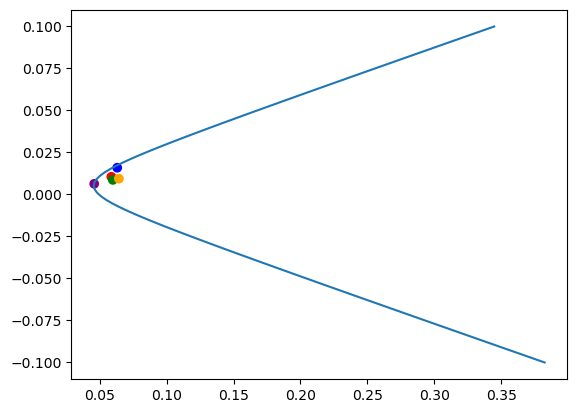

In [183]:
colors = ['red', 'green', 'blue', 'purple', 'orange']

plt.plot(sigma_v1, target_ret, linestyle='-')
plt.scatter(np.sqrt(variance), z_bar, c=colors)

2) Construire le graphique de « mean-variance locus » (avec l’actif sans risque) de ces 5
portefeuilles d’industrie. Spécifiez chaque portefeuille d’industrie dans le graphique.
Présentez et discutez ces résultats. Expliquez comment le « mean-variance locus » a changé
avec l’actif sans risque. 

(0.0, 0.4014213622025131)

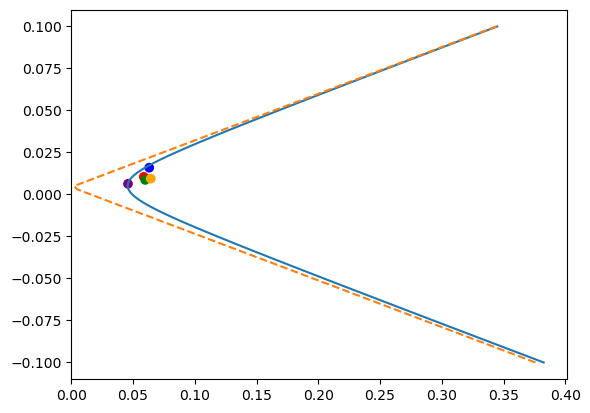

In [195]:
colors = ['red', 'green', 'blue', 'purple', 'orange']

plt.plot(sigma_v1, target_ret, linestyle='-')
plt.plot(sigma_v2, target_ret, linestyle='--')
plt.scatter(std, z_bar, c=colors)
plt.xlim(0)

(0.0, 0.4015058817498462)

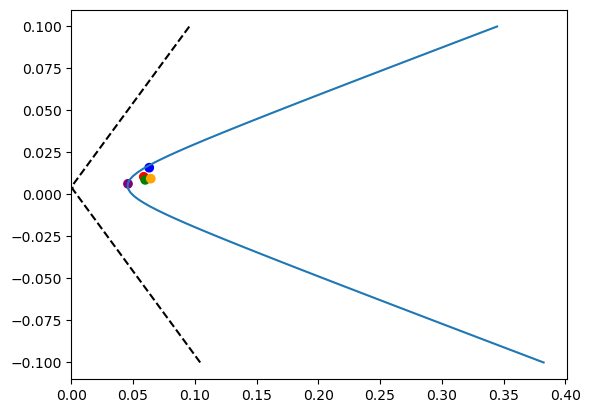

In [185]:
colors = ['red', 'green', 'blue', 'purple', 'orange']

plt.plot(Z, target_ret, linestyle='--', color='black')

plt.plot(sigma_v1, target_ret, linestyle='-')
plt.scatter(np.sqrt(variance), z_bar, c=colors)
plt.xlim(0)

3) Décrire le portefeuille de tangente et ses caractéristiques comme sa moyenne et variance et
les poids de chaque actif. Vérifiez numériquement que le portefeuille de tangente est le
portefeuille qui maximise le ratio de Sharpe. Présentez et discutez ces résultats.

(0.0, 0.7019426205977841)

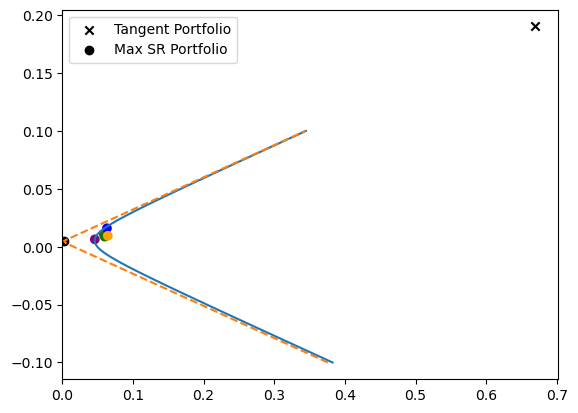

In [194]:
colors = ['red', 'green', 'blue', 'purple', 'orange']

plt.plot(sigma_v1, target_ret, linestyle='-')
plt.plot(sigma_v2, target_ret, linestyle='--')
plt.scatter(std, z_bar, c=colors)
plt.scatter(std_wt, rend_wt, color='black', marker='x', label='Tangent Portfolio')
plt.scatter(sigma_v2[max_sharpe_ratio_index], target_ret[max_sharpe_ratio_index], color='black', marker='o', label='Max SR Portfolio')
plt.legend()
plt.xlim(0)

In [187]:
sigma_v2[max_sharpe_ratio_index], target_ret[max_sharpe_ratio_index]

(0.11865870952097944, 0.037373737373737365)

In [188]:
print("Weights of the tangent portfolio:")
print(wt)
print("\nExpected return of the tangent portfolio:")
print(rend_wt)
print("\nVariance of the tangent portfolio:")
print(var_wt)
print("\nStandard deviation of the tangent portfolio:")
print(std_wt)

Weights of the tangent portfolio:
[[-16.04592513]
 [  4.65183439]
 [ 26.97178548]
 [ -8.58382231]
 [ -5.99387243]]

Expected return of the tangent portfolio:
[[0.19020324]]

Variance of the tangent portfolio:
[[0.44706374]]

Standard deviation of the tangent portfolio:
[[0.66862825]]


In [189]:
print("Weights of the tangent portfolio:")
print(wt)
print("\nExpected return of the tangent portfolio:")
print(rend_wt_m)
print("\nVariance of the tangent portfolio:")
print(var_wt_m)
print("\nStandard deviation of the tangent portfolio:")
print(std_wt_m)

Weights of the tangent portfolio:
[[-16.04592513]
 [  4.65183439]
 [ 26.97178548]
 [ -8.58382231]
 [ -5.99387243]]

Expected return of the tangent portfolio:
[[0.19020324]]

Variance of the tangent portfolio:
[[0.44706374]]

Standard deviation of the tangent portfolio:
[[0.66862825]]


In [190]:
# Calculate the Sharpe ratio for the tangent portfolio
sharpe_ratio_tangent = (rend_wt - rf) / std_wt

# Calculate the Sharpe ratio for other portfolios
sr = (target_ret - rf) / sigma_v2

# Find the portfolio with the maximum Sharpe ratio
max_sharpe_ratio = np.max(sr)

# Find the index of the portfolio with the maximum Sharpe ratio
max_sharpe_ratio_index = np.argmax(sr)

# Print the Sharpe ratio for the tangent portfolio
print("Sharpe ratio of the tangent portfolio:")
print(sharpe_ratio_tangent)

# Print the Sharpe ratio for the portfolio with the maximum Sharpe ratio
print("Sharpe ratio of the portfolio with the maximum Sharpe ratio:")
print(max_sharpe_ratio)

# Print the index of the portfolio with the maximum Sharpe ratio
print("Weights of the portfolio with the maximum Sharpe ratio:")
print(weights_v2[max_sharpe_ratio_index])


Sharpe ratio of the tangent portfolio:
[[0.27788721]]
Sharpe ratio of the portfolio with the maximum Sharpe ratio:
0.2778872069892809
Weights of the portfolio with the maximum Sharpe ratio:
[-0.05617747  0.01628627  0.09442937 -0.03005233 -0.0209848 ]


In [191]:
weights_v2[max_sharpe_ratio_index], wt.T/2

(array([-0.05617747,  0.01628627,  0.09442937, -0.03005233, -0.0209848 ]),
 array([[-8.02296256,  2.32591719, 13.48589274, -4.29191116, -2.99693621]]))

In [192]:
np.sum(weights_v2[max_sharpe_ratio_index]), np.sum(wt)

(0.0035010426010343085, 1.0000000000000053)